<a href="https://colab.research.google.com/github/gloriabee/TwitterSentimentAnalysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and analyze dataset

In [113]:
import pandas as pd
import numpy as np

In [114]:
df=pd.read_csv('tweet_data.csv')

In [115]:
df.shape

(18727, 3)

In [116]:
df.sample(5)

,textID,tweet_text,sentiment
7579,1965097923,its too early to be up! wishes i could sleep i...,positive
15557,1752592863,watching &quot;Say Anything&quot; - great '80s...,positive
13064,1696043152,@espowari really? awesome! we love it...and I ...,positive
524,1957209074,@cocoy @mike_online That's the sad thing about...,negative
245,1957087793,Missing you all deeply,negative




*   print a tweet and its sentiment based on a tweet ID


In [117]:
tweet_id=4879
tweet=df.iloc[tweet_id]
# print(f"Tweet: {tweet["tweet_text"]}")
print(f"Tweet: {tweet['tweet_text']}")
print(f"Tweet sentiment: {tweet['sentiment']}")

Tweet: Bad Day. History Test Tommorrow. And I want to go out in the sun and play..
Tweet sentiment: negative


## Dataset Visualization

### Matplotlib


*   import the pyplot module from the matplotlib package



In [118]:
import matplotlib.pyplot as plt


* `pyplot` helps understanding and representing how tweets are distributed over the dataset

In [119]:
sentiment_count= df['sentiment'].value_counts()
sentiment_count

,count
sentiment,
positive,9897
negative,8830


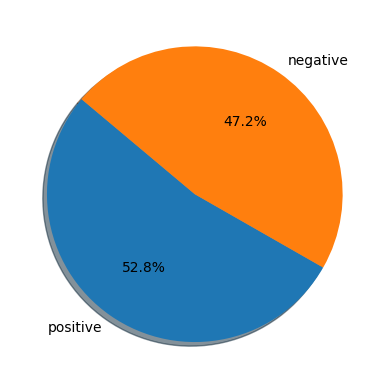

In [120]:
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%',shadow=True,startangle=140)
plt.show()

### Wordclouds



*   The **Wordclouds** package is very useful to get a quick overview of most recurrent words in the text corpus


In [121]:
from wordcloud import WordCloud



*   What are the words most often present in positive tweets?



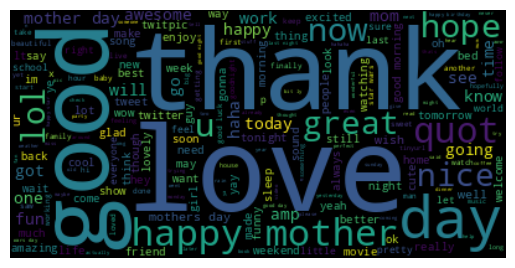

In [122]:
pos_tweets=df[df['sentiment']=='positive']
txt= " ".join(tweet.lower() for tweet in pos_tweets['tweet_text'])
wordcloud=WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



* ... and in negative tweets?



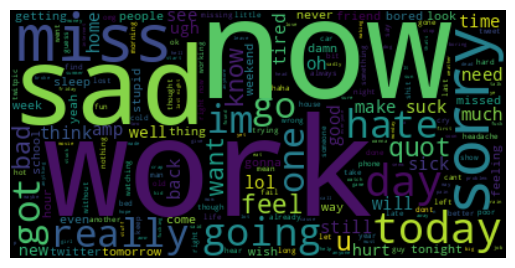

In [123]:
pos_tweets=df[df['sentiment']=='negative']
txt= " ".join(tweet.lower() for tweet in pos_tweets['tweet_text'])
wordcloud=WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text Normalization



*   Import regex package



In [124]:
import re

### Twitter features



*   Example of a random tweet that can be found on Twitter



In [125]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

In [126]:
tweet

'RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun'

#### RT Tag

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

Handle the RT Tag
* Replace occurences of RT with a default value



In [127]:
def replace_retweet(tweet,default_replace=''):
  tweet=re.sub('RT\s+',default_replace,tweet)
  return tweet

In [128]:
print(f"Processed tweet: {replace_retweet(tweet)}")

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


#### @User Tag



*   Replace @_Someone_ with a default user tag


In [129]:
def replace_user(tweet,default_replace=''):
  tweet=re.sub('\B@\w+',default_replace,tweet)
  return tweet

In [130]:
print(f"Processed tweet :{replace_user(tweet)}")

Processed tweet :RT  I love this! 👍 https://AIOutsider.com #NLP #Fun


#### Emojis



*   Install the emoji package



In [131]:
pip install emoji --upgrade



*   import the installled package



In [132]:
import emoji

* Replace emojis with a meaningful text

In [133]:
def demojize(tweet):
  tweet=emoji.demojize(tweet)
  return tweet

In [134]:
print(f"Processed tweet: {demojize(tweet)}")

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


#### URLs

Handle the url
* Replace occurences of **http://** or **https//** with a default value

In [135]:
def replace_url(tweet,default_replace=''):
  tweet=re.sub('(http|https):\/\/\S+',default_replace,tweet)
  return tweet

In [136]:
print(f"Processed tweet: {replace_url(tweet)}")

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


#### Hashtags



*   Replace occurences of #_something with a default value




In [137]:
def replace_hashtag(tweet,default_replace=''):
  tweet=re.sub('#+',default_replace,tweet)
  return tweet

In [138]:
print(f"Processed tweet: {replace_hashtag(tweet)}")

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


### General Features

Let's now have a look at some other features that are not really Twitter-dependent

In [139]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

#### Remove upper capitalization



*   Lower case each letter in a specific tweet



In [140]:
def to_lowercase(tweet):
  return tweet.lower()

In [141]:
print(f"Processed tweet: {to_lowercase(tweet)}")

Processed tweet: looooooook at this ... i'd like it so much!


#### Word Repetition

* Replace word repetition with a single occurence ("ooooo" becomes "oo")

In [142]:
def word_repetition(tweet):
  tweet=re.sub(r'(.)\1+',r'\1\1',tweet)
  return tweet

In [143]:
print(f"Processed tweet: {word_repetition(tweet)}")

Processed tweet: LOOK at this .. I'd like it so much!


#### Punctuation Repetition

* replace punctuation repetition with a single occurence("!!!!!" becomes "!")

In [144]:
def punct_repetition(tweet,default_replace=''):
  tweet=re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace,tweet)
  return tweet


In [145]:
print(f"Processed tweet: {punct_repetition(tweet)}")

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


#### Word Contraction

* install the contractions package

In [146]:
pip install contractions

* import the installed package

In [147]:
import contractions

* Use contractions_dict to list most common contractions

In [148]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a fix_contractions function used to replace contractions with their extended forms by using the contractions dictionary.

In [149]:
def _fix_contractions(tweet):
  for k,v in contractions.contractions_dict.items():
    tweet=tweet.replace(k,v)
  return tweet

In [150]:
print(f"Processed tweet: {_fix_contractions(tweet)}")
#

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


* Create a fix_contractions function used to replace contractions with their extended forms by using the contractions package.

In [151]:
def _fix_contractions(tweet):
  tweet= contractions.fix(tweet)
  return tweet


In [152]:
print(f"Processed tweet: {_fix_contractions(tweet)}")
#

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


### Tokenizations




*   Tokenization is a way to separate text into smaller chunks


**Tokenization Exceptions**

*   Punctuation
*   Stopwords
*   Numbers





#### Easy Tokenization

*   Install the NLTK package


In [153]:
pip install nltk



*   import NLTK
*   import the word_tokenize module from NLTK
*   download the Punkt tokenizer model from NLTK




In [154]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

* Simple tweet to be tokenized

In [155]:
tweet= "These are 5 different words!"

* Create tokenize() function that takes a tweet as input and returns a list of  tokens

In [156]:
word_tokenize(tweet)

['These', 'are', '5', 'different', 'words', '!']

#### Custom Tokenization

* import the string package



In [157]:
import string

* retrieve english punctuation signs by using the string package

In [158]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~




*   import stopwords module from NLTK
*   download stopwords from NLTK



In [159]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* create a set of english stopwords

In [160]:
stop_words=set(stopwords.words('english'))
print(stop_words)

{'its', 'yourselves', 'should', 'by', 'during', 'more', 'here', "needn't", 'they', 'her', "she's", "he's", 'been', 'above', 're', "we're", 'just', 'ain', "doesn't", "they'll", 'with', 'down', 'this', 'into', 'mustn', 'my', 'don', 'off', 'itself', 'o', 'under', 'himself', "weren't", "shan't", 'before', "mightn't", 'not', 'other', 'because', 'now', 'such', 'me', 'herself', 'after', "hasn't", 'why', 'wasn', 'where', 'his', 'of', 'ourselves', 'be', 'whom', 'has', 'as', 'm', 'any', 'same', 'too', 'about', 'yourself', 'and', "you're", "wasn't", 'she', 'that', 'their', "it's", 'below', 'isn', "should've", "he'd", 'most', 'both', 'didn', 'than', 'can', 'each', 'i', 'won', 'aren', 'is', 'couldn', 's', "you'll", 'do', 'mightn', "don't", "she'll", "you'd", 'at', "i'm", 'wouldn', 'he', 'those', "hadn't", "i'd", 't', 'only', 'theirs', "we've", "won't", 'does', 'once', "mustn't", 'over', "you've", 'it', "didn't", 'ours', 'll', 'if', 'shan', 'shouldn', 'from', 'having', 'myself', 'yours', 'them', "i'

* remove stopwords from the set

In [161]:
#stop_words.discard('not')

* create a custom_tokenize function

In [162]:
def custom_tokenize(tweet,keep_punct=False,keep_alnum=False,keep_stop=False):
  token_list=word_tokenize(tweet)
  if not keep_punct:
    token_list=[token for token in token_list if token not in string.punctuation]

  if not keep_alnum:
    token_list=[token for token in token_list if token.isalpha()]

  if not keep_stop:
    token_list= [token for token in token_list if not token in stop_words]

  return token_list


* Test the function with a particular tweet

In [163]:
print(f'Tweet tokens: {custom_tokenize(tweet,keep_punct=True,keep_alnum=True,keep_stop=True)}')
print(f'Tweet tokens: {custom_tokenize(tweet,keep_stop=True)}')
print(f'Tweet tokens: {custom_tokenize(tweet,keep_alnum=True)}')
#

Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['These', 'are', 'different', 'words']
Tweet tokens: ['These', '5', 'different', 'words']


### Stemmming

Stemming is the process of reducing words to their root form.
* Rule-based approach
* Faster but chops words
* Meaning is less important

Over-stemming -> univers*al*, univers*ity*,
univers*e*


Under-stemming -> alumnu*e*, alumni, alumna*e*



*   import different libraries and modules used for stemming



In [164]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer



*   Lists of tokens to stem (remember that we stem tokens and not entire sentences)


In [165]:
tokens= ["manager","management","managing"]



*   Stemmers can be defined by directly using NLTK.



In [166]:
ps=PorterStemmer()
ls=LancasterStemmer()
ss=SnowballStemmer('english')

* Create a stem_tokens function that takes the list of tokens as input and returns a list of stemmed tokens

In [167]:
def stem_tokens(tokens,stemmer):
  token_list=[]
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* print the different results and compare the stemmed tokens

In [168]:
print(f"Porter stems: {stem_tokens(tokens,ps)}")
print(f"Lancaster stems: {stem_tokens(tokens,ls)}")
print(f"Snowball stems: {stem_tokens(tokens,ss)}")

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [169]:
tokens=['international','companies','had','interns']
print(f"Porter stems: {stem_tokens(tokens,ps)}")
print(f"Lancaster stems: {stem_tokens(tokens,ls)}")
print(f"Snowball stems: {stem_tokens(tokens,ss)}")

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


### What is Lemmatization?

**Lemmatization** serves the same purpose as Stemming but makes use of word context.

* import different libraries and modules used for lemmatization

In [170]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* Lists of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [171]:
tokens= ["international","companies","had","interns"]



* Part of Speech (POS) tagging



In [172]:
word_Type={"international":wordnet.ADJ,
           "companies":wordnet.NOUN,
           "had":wordnet.VERB,
           "interns":wordnet.NOUN}

* Create the lemmatizer by using the WordNet module

In [173]:
lemmatizer= WordNetLemmatizer()

* Create a lemmatize_tokens function that takes the lists of tokens as input and returns a list of lemmatized tokens

In [174]:
def lemmatize_tokens(tokens,word_Type,lemmatizer):
  token_list=[]
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token,word_Type[token]))
  return token_list

In [175]:
print(f"Tweet lemma: {lemmatize_tokens(tokens,word_Type,lemmatizer)}")

Tweet lemma: ['international', 'company', 'have', 'intern']


### Tweet Pre-processing


#### Putting it all together

* Long and complex tweet to be processed

In [176]:
complex_tweet = r"""RT @AIOutsider : he looooook,
THis is a big and complex TWeet!!! 👍 ...
We'd be glad if you couldn't normalize it!
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

In [177]:
def process_tweet(tweet,verbose=False):
  if verbose: print(f"initial tweet: {tweet}")

  ## Twitter Features
  tweet=replace_retweet(tweet)
  tweet=replace_user(tweet)
  tweet=replace_url(tweet)
  tweet=replace_hashtag(tweet)
  if verbose: print(f"Post twitter processing tweet: {tweet}")

  ## Word Features
  tweet=to_lowercase(tweet)
  tweet=_fix_contractions(tweet)
  tweet=word_repetition(tweet)
  tweet=punct_repetition(tweet)
  tweet=demojize(tweet)

  if verbose: print(f"Post Word processing tweet: {tweet}")

  ## Tokenization & Stemming
  tokens=custom_tokenize(tweet,keep_alnum=False,keep_stop=False)
  stemmer= SnowballStemmer("english")
  stem=stem_tokens(tokens,stemmer)
  return stem

In [178]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


## Text Vectorization

**Why Representing Text?**

Representing text numerically allows it to be understood by ML models.

**Vectorizing methods**
* Positive/Negative Frequencies
* Bag of Words
* TF-IDF


### Text Representation

#### Processing Tweets

* install the Scikit-learn package which is very useful for a lot of different ML tasks
* Note: make sure it is installed and up-to-date (once installed/updated, you might be asked to reload Colab)

In [179]:
pip install -U scikit-learn

* Apply process_tweet function created in section 2 to the entire DataFrame
* Convert sentiment to 1 for 'positive' and 0 for 'negative' sentiment

In [180]:
df['tokens']=df['tweet_text'].apply(process_tweet)

In [181]:
df['tweet_sentiment']=df['sentiment'].apply(lambda x:1 if x=='negative' else 0)

In [182]:
df.head()

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",1
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",1
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",0
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[go, prom, bf, like, friend]",1
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],1


* Convert Dataframe to two lists: one for the tweet tokens (X) and one for the tweet sentiment(y)

In [183]:
X=df['tokens'].tolist() # input data
y=df['tweet_sentiment'].tolist() # output data

In [184]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['go', 'prom', 'bf', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', 'type', 'comput', 'middl', 'n

### Positive and Negative Frequencies

Tweet => I am glad I got hired

Tweet => This is great

Tweet => This is bad

Tweet => I am sad I got fired

| Month    | Freq(w,1)|Freq(w,0) |
| -------- | ------- | ------- |
| I | 2   | 2 |
| am | 1    | 1
|glad   | 1    | 0
|got  | 1   | 1
|hired | 1    | 0
|fired | 0 | 1
|This | 1   | 1
|is   | 1    | 1
|great  | 1    | 0
|bad   | 0   | 1

New Tweet => I got fired, this is bad

X=[Pos Freq, Neg Freq]

X= [ Sum(Freq(w,1)), Sum(Freq(W,0))]

X=[5,7]


#### Positive/Negative Frequency

* Corpus of tweet tokens used for the first method

In [185]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]
sentiment=[1,0,1,1,0,0]

* Create a build-freqs function used to build a dictionary with the word and sentiment as index and the count of occurence as value


| Word    | Positive |Negative |
| -------- | ------- | ------- |
| love | dict[(love,1)]   | dict[(love,0)] |
| lost | dict[(lost,1)]    | dict[(lost,0)]
|happy  | dict[(happy,1)]    | dict[(happy,0)]


In [186]:
def build_freqs(tweet_list,sentiment_list):
  freqs={}
  for tweet,sentiment in zip(tweet_list,sentiment_list):
    for word in tweet:
      pair=(word,sentiment)
      if pair in freqs:
        freqs[pair]+=1
      else:
        freqs[pair]=1
  return freqs


* build the frequency dictionary on the corpus by using the function

In [187]:
freqs= build_freqs(corpus,sentiment)

In [188]:
freqs

{('i', 1): 2,
 ('love', 1): 2,
 ('nlp', 1): 1,
 ('i', 0): 3,
 ('miss', 0): 1,
 ('you', 0): 1,
 ('you', 1): 2,
 ('are', 1): 1,
 ('happy', 1): 1,
 ('to', 1): 1,
 ('learn', 1): 1,
 ('lost', 0): 1,
 ('my', 0): 1,
 ('computer', 0): 1,
 ('am', 0): 1,
 ('so', 0): 1,
 ('sad', 0): 1}

In [189]:
freqs_all=build_freqs(X,y)

In [190]:
freqs_all

{('layin', 1): 2,
 ('n', 1): 59,
 ('bed', 1): 110,
 ('headach', 1): 99,
 ('call', 1): 101,
 ('funer', 1): 10,
 ('friday', 1): 86,
 ('want', 0): 295,
 ('hang', 0): 41,
 ('friend', 0): 194,
 ('soon', 0): 142,
 ('go', 1): 1020,
 ('prom', 1): 11,
 ('bf', 1): 7,
 ('like', 1): 550,
 ('friend', 1): 156,
 ('hmm', 1): 18,
 ('charlen', 1): 1,
 ('love', 1): 67,
 ('miss', 1): 754,
 ('sorri', 1): 387,
 ('least', 1): 35,
 ('choke', 1): 1,
 ('retain', 1): 2,
 ('ugh', 1): 155,
 ('beat', 1): 11,
 ('stupid', 1): 124,
 ('song', 1): 42,
 ('get', 1): 684,
 ('next', 1): 94,
 ('rude', 1): 7,
 ('watch', 1): 150,
 ('hill', 1): 7,
 ('london', 1): 14,
 ('realis', 1): 6,
 ('tourtur', 1): 1,
 ('week', 1): 157,
 ('late', 1): 84,
 ('itonlinelol', 1): 1,
 ('sleepi', 1): 17,
 ('even', 1): 162,
 ('fail', 1): 112,
 ('ladi', 1): 12,
 ('gaga', 1): 2,
 ('tweet', 1): 102,
 ('impress', 1): 13,
 ('video', 1): 20,
 ('leak', 1): 4,
 ('know', 1): 336,
 ('convinc', 1): 5,
 ('alway', 1): 84,
 ('want', 1): 470,
 ('signal', 1): 5,
 

In [191]:
print(f"Frequency of word 'love' in positive tweets : {freqs_all[('love',1)]}")

Frequency of word 'love' in positive tweets : 67


In [192]:
print(f"Frequency of word 'love' in negative tweets : {freqs_all[('love',0)]}")

Frequency of word 'love' in negative tweets : 1358


* Create a tweet_to_freqs function used to convert tweets to a 2d array by using the frequency dictionary

In [193]:
def tweet_to_freqs(tweet,freqs):
  X= np.zeros((2,))
  for word in tweet:
    if (word,1) in freqs:
      X[0]+=freqs[(word,1)]
    if (word,0) in freqs:
      X[1]+=freqs[(word,0)]
    return X

Print the 2d vector by using the tweet_to_freqs function and the corpus dictionary

In [194]:
print(tweet_to_freqs(["I","love","nlp"],freqs))

[0. 0.]


Print the 2d vector by using the tweet_to_freqs function and the dataset dictionary

In [195]:
print(tweet_to_freqs(["I","love","nlp"],freqs_all))

[0. 0.]


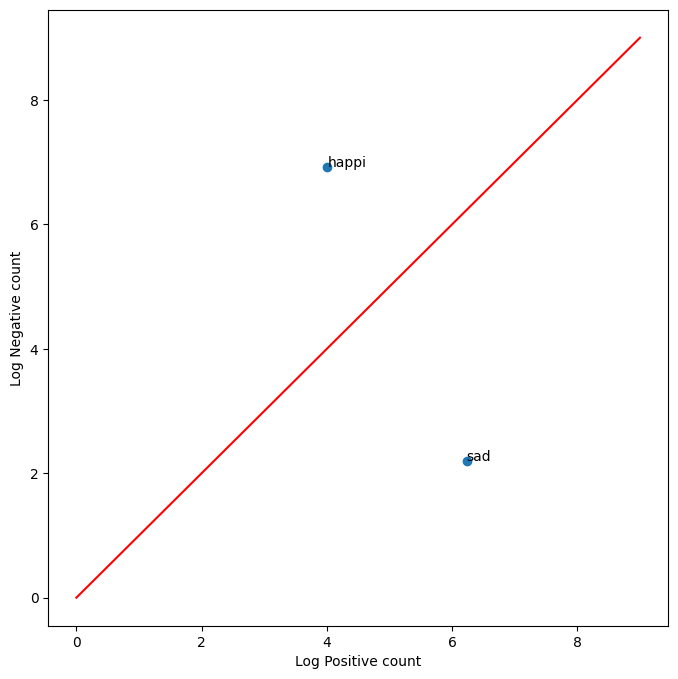

In [196]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "happi"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

### Bag Of Words

Tweet 1 -> I like to learn

Tweet 2 -> We all like and all want to learn


| *Words* | I | all | we | like | and | want | learn | to |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| *features*  | 1  | 2  | 3 | 4 | 5  | 6  |7  |  8  |
| Vector 1 | 1 | 0 | 0 | 1 | 0 | 0 | 1 | 1 |
| Vector 2 | 0| 2 | 1 | 1 | 1| 1 | 1 | 1 |


Matrix dimension = (# of tweets, # unique words in corpus)


#### Bag of Word

* Corpus of tweet tokens used for the second method

In [197]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

corpus

[['love', 'nlp'],
 ['miss', 'you'],
 ['hate', 'hate', 'hate', 'love'],
 ['happy', 'love', 'hate'],
 ['i', 'lost', 'my', 'computer'],
 ['i', 'am', 'so', 'sad']]

* import CountVectorizer from the Scikit-learn Library

In [198]:
from sklearn.feature_extraction.text import CountVectorizer

* Create a fit_cv function used to build the Bag of Words vectorizer with the corpus.

In [199]:
def fit_cv(tweet_corpus):
  cv=CountVectorizer(tokenizer=lambda x:x, preprocessor=lambda x:x)
  cv.fit(tweet_corpus)
  return cv


* Use the fit_cv function to fit the vectorizer on the corpus.

In [200]:
cv_vect=fit_cv(corpus)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Get the vectorizer features (matrix columns)

In [201]:
ft= cv_vect.get_feature_names_out()
print(f'There are {len(ft)} features in this corpus')
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Convert the corpus to a matrix by using the vectorize

In [202]:
cv_mtx= cv_vect.transform(corpus).toarray()

* print the matrix shape

In [203]:
cv_mtx.shape

(6, 13)

* Transform a new tweet by using the vectorizer

In [204]:
new_tweet=[["lost","lost","miss","miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [205]:
unknown_tweet=[["John","drives","cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### TF-IDF

TF = Term Frequency

IDF= Inverse Document frequency

* corpus of tweet tokens used for the third method

In [206]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

In [207]:
corpus

[['love', 'nlp'],
 ['miss', 'you'],
 ['hate', 'hate', 'hate', 'love'],
 ['happy', 'love', 'hate'],
 ['i', 'lost', 'my', 'computer'],
 ['i', 'am', 'so', 'sad']]

* import TfidfVectorizer from the Scikit-learn library

In [208]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Create a fit_tfidf function used to build the TF-IDF vectorizer with the corpus

In [209]:
def fit_tfidf(tweet_corpus):
  tfidf=TfidfVectorizer(tokenizer=lambda x:x, preprocessor=lambda x:x)
  tf_vect=tfidf.fit(tweet_corpus)
  return tf_vect

* Use the fit_cv function to fit the vectorizer on the corpus, and transform the corpus.

In [210]:
tf_vect=fit_tfidf(corpus)
tf_mtx=tf_vect.transform(corpus).toarray()

In [211]:
tf_mtx

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

* get the vectorizer features (matrix columns)

In [212]:
ft= tf_vect.get_feature_names_out()
print(f'There are {len(ft)} features in this corpus')
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Print the matrix shape

In [213]:
print(tf_mtx.shape)

(6, 13)


* Transform a  new tweet by using the vectorizer

In [214]:
new_tweet=[["I","hate","nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

### Sentiment Analysis Model

**What is logistic regression?**
Use of logistic function to model a binary dependent variable



#### Train/Test Split

* Check what X and y looks like

In [215]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['go', 'prom', 'bf', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', 'type', 'comput', 'middl', 'n

* import the train_test_split function from the Scikit-learn package.

In [216]:
from sklearn.model_selection import train_test_split

* Use the train_test_split function to split arrays of X and y into training and testing variables.

In [218]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

* Print the size of these news variables

In [222]:
print(f"Size of X_train: {len(X_train)}")
print(f"Size of y_train: {len(y_train)}")
print(f"Size of X_train: {len(X_test)}")
print(f"Size of X_train: {len(y_test)}")
print("\n")
print(f"Train proportion: {len(X_train)/(len(X_train)+len(X_test))}")

Size of X_train: 14981
Size of y_train: 14981
Size of X_train: 3746
Size of X_train: 3746


Train proportion: 0.7999679606984568


* print random tweets just to verify everything goes as expected

In [226]:
import random

In [227]:
id= random.randint(0,len(X_train))
print(f"Tweet: {X_train[id]}")
print(f"Sentiment: {y_train[id]}")

Tweet: ['girrll', 'go', 'miss', 'bad']
Sentiment: 1


### Logistic Regression

#### Model

* Import the LogisticRegression Model from Scikit-Learn

In [242]:
from sklearn.linear_model import LogisticRegression

* Create a fit_lr function used to fit a logistic regression model on X and y training data.

In [239]:
def fit_lr(X_train,y_train):
  model=LogisticRegression()
  model.fit(X_train,y_train)
  return model

#### Pos/Neg Frequency

* Use the build_freqs function on training data to create a frequency dictionary
* Use the frequency dictionary together with the tweet_to_freq function to convert X_train and X_test data to 2d vectors

In [237]:
freqs= build_freqs(X_train,y_train)
X_train_pn=[tweet_to_freqs(tweet,freqs) for tweet in X_train]
X_test_pn=[tweet_to_freqs(tweet,freqs) for tweet in X_test]

* fit the logistic regression model on training data by using the fit_lr function
* print the model coefficients (betas and intercept)

In [243]:
# model_lr_pn=fit_lr(X_train_pn,y_train)
# print(model_lr_pn.coef_)
# print(model_lr_pn.intercept_)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14981,) + inhomogeneous part.

#### Count Vector

* Use the fit_cv function on training data to build the Bag of Words vectorizer
* Transform X_train and X_test data by using the vectorizer

In [247]:
cv= fit_cv(X_train)
X_train_cv=cv.transform(X_train).toarray()
X_test_cv=cv.transform(X_test).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Fit the Logistic Regression model on training data by using the fit_lr function.

In [249]:
model_lr_cv=fit_lr(X_train_cv,y_train)

#### TF-IDF

* Use the fit_cv function on training data to build the Bag of words vectorizer
* Transform X_train and X_test data by using the vectorizer.

In [250]:
tf= fit_cv(X_train)
X_train_tf=tf.transform(X_train)
X_test_tf=tf.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [261]:
model_lr_tf=fit_lr(X_train_tf,y_train)

#### Performance Matrix

* import the accuracy score and confusion matrix from Scikit-learn

In [252]:
from sklearn.metrics import accuracy_score, confusion_matrix

#### positive, negative frequencies

* Use the fitted model_lr_pn(positive/negative frequencies) to predict X_test

In [253]:
# y_pred_lr_pn= model_lr_pn.predict(X_test_pn)

NameError: name 'model_lr_pn' is not defined

* print the model accuracy by comparing predictions and real sentiments.

In [254]:
# print(f"LR  model Accuracy: {accuracy_score(y_test,y_pred_lr_pn)}")

NameError: name 'y_pred_lr_pn' is not defined

* plot the confusion matrix by using the plot_confusion helper function

In [ ]:
# plot_confusion(confusion_matrix(y_test,y_pred_lr_pn))

#### Count Vector

* Use the fitted model_lr_cv(Bag of words) to predict X_test

In [255]:
y_pred_lr_cv=model_lr_cv.predict(X_test_cv)

* plot the confusion matrix by comparing predictions and real sentiments.

In [256]:
print(f"LR Model Accuracy: {accuracy_score(y_test,y_pred_lr_cv)} ")

LR Model Accuracy: 0.8788040576615056 


* plot the confusion matrix by using the plot_confusion helper function

<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

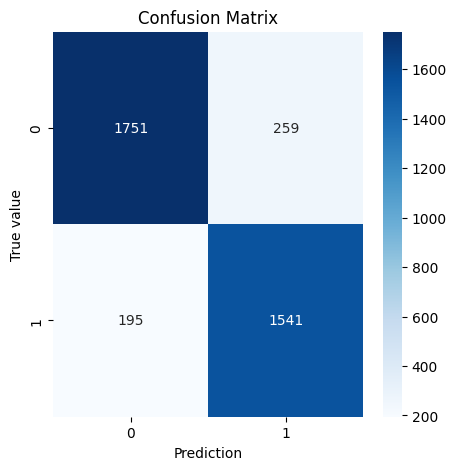

In [259]:
plot_confusion(confusion_matrix(y_test,y_pred_lr_cv))

#### Helper function

This function will be used to plot the confusion matrix for the different models we will create

In [258]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

#### TF_IDF

* Use the fitted model_lr_tf(TF_IDF) to predict X_test

In [262]:
y_pred_lr_tf=model_lr_tf.predict(X_test_tf)

* Print the model accuracy by comparing predictions and real sentiments

In [263]:
print(f"LR Model Accuracy: {accuracy_score(y_test,y_pred_lr_tf)}")

LR Model Accuracy: 0.8788040576615056


* Plot the confusion matrix by using the plot_confusion helper function

<module 'seaborn' from '/usr/local/lib/python3.11/dist-packages/seaborn/__init__.py'>

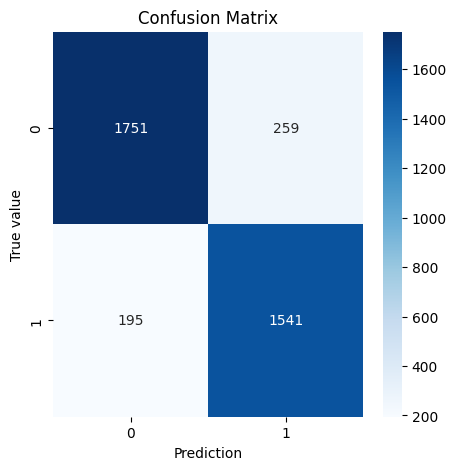

In [264]:
plot_confusion(confusion_matrix(y_test,y_pred_lr_tf))

### Mini Pipeline

* Final tweet used to check if the model works as well as expected
* Note don't hestitate to input your own tweet!

In [272]:
your_tweet = """RT @AIOutsider: I love you ..."""

* Create a  predict_tweet function used to pre-process, transform and predict tweet sentiment

In [273]:
def predict_tweet(tweet):
  processed_tweet=process_tweet(tweet)
  transformed_tweet= tf.transform([processed_tweet])
  prediction=model_lr_tf.predict(transformed_tweet)
  if prediction==1:
    return "Prediction is positive sentiment"
  else:
    return "Prediction is negative sentiment"


* Predict your tweet sentiment by using the predict_tweet function!

In [275]:
predict_tweet(your_tweet)

'Prediction is negative sentiment'